## Initial setup

In [9]:
%connect_info
'''
Enayat A. Moallemi <e.moallemi@unsw.edu.au>

Created on 22 May 2018

Fraunhofer ISI, Karlsruhe

'''


import sys
sys.path.append(r'W:\emoallemi@student.unimelb.edu.au 2017-09-13 08_19\My Library\UNSW\EMA\EMAworkbench-master_130118')

from EMAworkbench.ema_workbench.util import ema_logging
from EMAworkbench.ema_workbench.connectors import import_MATISSE_nopolicy
from EMAworkbench.ema_workbench.analysis.plotting_util import BOXPLOT, KDE, VIOLIN
from EMAworkbench.ema_workbench.analysis.plotting import envelopes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
from EMAworkbench.ema_workbench.analysis import prim
import pareto
import os
import glob



{
  "shell_port": 62419,
  "iopub_port": 62420,
  "stdin_port": 62421,
  "control_port": 62422,
  "hb_port": 62423,
  "ip": "127.0.0.1",
  "key": "d3897c99-5e00d05994f90e76d87105f6",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-6250b570-cab6-4984-b73f-8234eb839024.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


ImportError: cannot import name 'import_MATISSE_nopolicy' from 'EMAworkbench.ema_workbench.connectors' (C:\Users\angel\Documents\GitHub\gr4sp\experiments\EMAworkbench\ema_workbench\connectors\__init__.py)

## Embedded connector

In [10]:
import numpy as np
import pandas as pd
import os
import glob

'''
uncertainties = ['position CO2 Ice', 'position Cost Ice', 'position MIV Ice', 'position ICT Ice', 'position Buildenv Ice',
                'position OeV Ice', 'position Conv Ice']
'''


uncertainties = ['directioncarMIV', 'directioncarOEV', 'directioncarICT', 'directioncarBuildenv', 
                 'directioncarCO2', 'directioncarCost', 'directioncarConv']
                 


policies = [ 
            {'name':'bev', 
             'file':r'\\Mac\Home\Desktop\data\bev'}, 
            {'name':'biofuel', 
             'file':r'\\Mac\Home\Desktop\data\biofuel'}, 
            {'name':'carshare', 
             'file':r'\\Mac\Home\Desktop\data\carshare'}, 
            {'name':'hybrid', 
             'file':r'\\Mac\Home\Desktop\data\hybrid'}, 
            {'name':'hydrogen', 
             'file':r'\\Mac\Home\Desktop\data\hydrogen'}, 
            {'name':'ICE', 
             'file':r'\\Mac\Home\Desktop\data\ICE'}, 
            {'name':'publictransport', 
             'file':r'\\Mac\Home\Desktop\data\publictransport'}, 
            {'name':'slowmodes', 
             'file':r'\\Mac\Home\Desktop\data\slowmodes'}
            ]

outcomes_of_interest = ['state', 'number supporter', 'strength', 
                        'practice CO2', 'practice Cost', 'practice private mo', 'practice ICT', 
                        'practice built env', 'practice public mo', 'practice conv.', 
                        'direction CO2', 'direction Cost', 'direction private mo', 'direction ICT', 
                        'direction built env', 'direction public mo', 'direction conv.', 
                        'supporter_p0_mean', 'supporter_p0_StdDev', 'supporter_p1_mean', 'supporter_p1_StdDev', 
                       'supporter_p2_mean', 'supporter_p2_StdDev', 'supporter_p3_mean', 'supporter_p3_StdDev', 
                        'supporter_p4_mean', 'supporter_p4_StdDev', 'supporter_p5_mean', 'supporter_p5_StdDev', 
                       'supporter_p6_mean', 'supporter_p6_StdDev']

nexp = 729

#

def listdir_nohidden(path):
    return glob.glob(os.path.join(path, '*')) 


#experiments = np.zeros(nexp*len(policies), dtype={'names':uncertainties, 'formats':['float64']*len(uncertainties)})
experiments = np.zeros(nexp*len(policies), dtype={'names':uncertainties+['policy'], 
                                                            'formats':['float64']*len(uncertainties)+['object']})
outcomes_dict = {}

for i, val in enumerate(policies):
    path = str(policies[i]['file'])
    resultfilelist = listdir_nohidden(path)
    count_policy_exp = i*nexp
    for j, resultfile in enumerate(resultfilelist):
        db_results = pd.read_csv(resultfile)     
        l = []
        for uncertainty in uncertainties:
            cell = db_results.loc[0, uncertainty]
            l.append(cell)
        l.append(policies[i]['name'])
        unc_set = tuple(l)
        experiments[j+count_policy_exp] = unc_set
        
        for outcome in outcomes_of_interest:
            outcomecolumn = db_results.loc[:, outcome]
            if i == 0:
                if j == 0:
                    outcomes_dict[outcome] = outcomecolumn.T.values
                else:
                    outcomes_dict[outcome] = np.vstack([outcomes_dict[outcome], outcomecolumn.T.values])
            else:
                outcomes_dict[outcome] = np.vstack([outcomes_dict[outcome], outcomecolumn.T.values])
            
            
        yearlist = db_results.iloc[:, 0].values
        outcomes_dict['time'] = np.tile(yearlist, (nexp*len(policies), 1))
        outcomes = outcomes_dict


results = experiments, outcomes

## Save the results

In [ ]:
from ema_workbench import save_results

save_results(results, r'W:\emoallemi@student.unimelb.edu.au 2017-09-13 08_19\My Library\UNSW\Publications\ETM-MATISSE\data\IcePosition3intervals_uncertaindiesupporter.tar.gz')

## Load the results

In [15]:
from EMAworkbench.ema_workbench import load_results

#results = load_results(r'W:\emoallemi@student.unimelb.edu.au 2017-09-13 08_19\My Library\UNSW\Publications\ETM-MATISSE\data\IcePosition3intervals_uncertaindiesupporter.tar.gz')
results = load_results(r'C:\Users\angel\Documents\jupyter_notebooks\IcePosition3intervals_uncertaindiesupporter.tar.gz')



In [16]:
experiments, outcomes = results

ooi = 'supporter_p5_mean'
outcomes['time'][0, :]



array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033,
       2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044,
       2045, 2046, 2047, 2048, 2049, 2050], dtype=int64)

In [17]:
experiments

,directioncarMIV,directioncarOEV,directioncarICT,directioncarBuildenv,directioncarCO2,directioncarCost,directioncarConv,policy
0,-0.5,0.4,0.4,0.4,-0.3,0.0,-0.1,bev
1,-0.5,0.4,0.2,0.3,-0.2,0.0,-0.2,bev
2,-0.4,0.5,0.4,0.2,-0.2,0.0,-0.1,bev
3,-0.4,0.6,0.2,0.2,-0.2,0.0,-0.3,bev
4,-0.6,0.6,0.4,0.2,-0.4,0.0,-0.2,bev
5,-0.5,0.5,0.2,0.4,-0.3,0.0,-0.1,bev
6,-0.5,0.6,0.4,0.4,-0.3,0.0,-0.3,bev
7,-0.6,0.5,0.3,0.4,-0.4,0.0,-0.1,bev
8,-0.4,0.6,0.3,0.4,-0.2,0.0,-0.2,bev
9,-0.4,0.4,0.2,0.2,-0.2,0.0,-0.1,bev


In [18]:
outcomes

{'direction Cost': array([[ 0.97367051,  0.92718092, -0.57664526, ...,  0.5483142 ,
          0.70270239,  0.70270239],
        [-0.7975756 ,  0.16451943,  0.00905431, ...,  0.73315915,
         -0.56922941, -0.08528965],
        [-0.31293146,  0.66296761,  0.68521587, ...,  0.66444908,
         -0.05379154,  0.16416883],
        ...,
        [ 0.        ,  0.71743584,  0.09581027, ..., -0.64340445,
         -0.54731216, -0.87619441],
        [ 0.        ,  0.67697925, -0.24770586, ..., -0.3704749 ,
          0.68864714,  0.48714306],
        [ 0.        ,  0.20417399, -0.79009652, ...,  0.74208353,
         -0.152662  , -0.01924952]]),
 'supporter_p1_StdDev': array([[12.90313108, 12.90313108, 12.90313108, ..., 12.90313108,
         12.90313108, 12.90313108],
        [12.90313108, 12.90313108, 12.90313108, ..., 12.90313108,
         12.90313108, 12.90313108],
        [12.90313108, 12.90313108, 12.90313108, ..., 12.90313108,
         12.90313108, 12.90313108],
        ...,
        [12.9

## Boxplot

Text(0, 0.5, 'supporters (year 2065)')

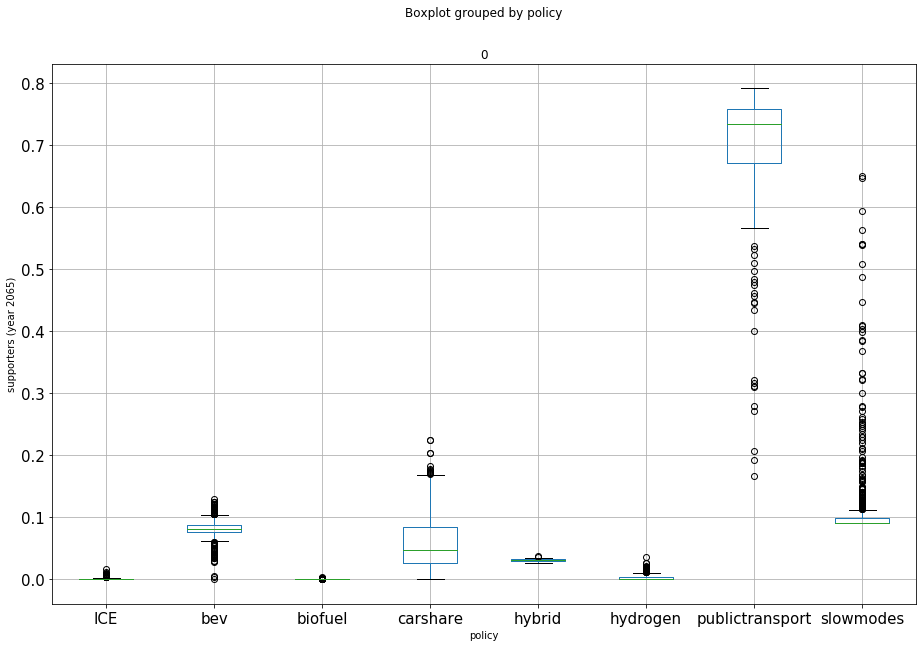

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

experiments, outcomes = results

ooi = 'number supporter'
data = outcomes[ooi][:, 49]

policies_to_compare = np.unique(experiments['policy'])


exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)
df_concat = pd.concat([exp, out], axis=1)


fig, ax = plt.subplots(1,1, figsize=(15, 10))

bp = df_concat.boxplot(ax=ax, column=[0], by="policy")

plt.yticks (fontsize = 15)

plt.xticks (fontsize = 15)


        
ax.set_ylabel('supporters (year 2065)', fontsize=10)


# '''
# plt.savefig('{}/fig{}.png'.format(r'W:\emoallemi@student.unimelb.edu.au 2017-09-13 08_19\My Library\UNSW\Publications\ETM-MATISSE\figs', '_boxplot_strength'), 
#             dpi=300, bbox_inches='tight')
# '''

## To represent the phaseout and the uptake of ICE vs. public transport over time.

C:\Users\angel\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\angel\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\angel\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\angel\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(ms

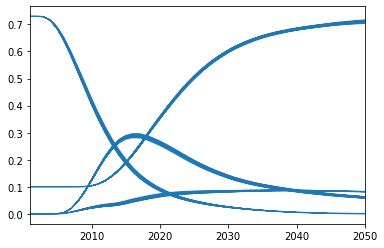

In [12]:
from ema_workbench.analysis.plotting import envelopes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import seaborn as sns
from ema_workbench.analysis.plotting_util import get_color, COLOR_LIST
experiments, outcomes = results

ooi = 'number supporter'

data = outcomes[ooi] 

tech_list = ['hybrid', 'ICE', 'bev', 'publictransport'] 

exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)
'''
ooi_results=[]

df_kde_list=[]
for i, tech in enumerate(tech_list):        
    truncated_outcomes = out[exp['policy'] == tech].values
    size = len(truncated_outcomes[:,time])
    df_kde_list.append(pd.DataFrame({'Share_of_supporter': truncated_outcomes[:, :].tolist(),
                                     'Technology':[tech]*size}, index=range(size)))
        
    df_kde=pd.concat(df_kde_list[i] for i in range(len(tech_list)))
    ooi_results.append(df_kde)'''

fig, ax = plt.subplots()
truncated_outcomes_0 = out[exp['policy'] == 'bev'].values
sns.tsplot(data=truncated_outcomes_0, time=outcomes['time'][0, :], err_style="boot_traces", n_boot=1000, ax=ax)

truncated_outcomes_1 = out[exp['policy'] == 'carshare'].values
sns.tsplot(data=truncated_outcomes_1, time=outcomes['time'][0, :], err_style="boot_traces", n_boot=1000, ax=ax)

truncated_outcomes_2 = out[exp['policy'] == 'ICE'].values
sns.tsplot(data=truncated_outcomes_2, time=outcomes['time'][0, :], err_style="boot_traces", n_boot=1000, ax=ax)

truncated_outcomes_3 = out[exp['policy'] == 'publictransport'].values
sns.tsplot(data=truncated_outcomes_3, time=outcomes['time'][0, :], err_style="boot_traces", n_boot=1000, ax=ax)

plt.show()

experiments, outcomes = results

ooi = 'number supporter'
data = outcomes[ooi] 

tech_list = ['slowmodes', 'ICE', 'carshare', 'publictransport'] 
time_list = [10, 20, 30, 40, 49]  

exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)

ooi_results=[]
df_kde_list=[]

for time in time_list:
    for i, tech in enumerate(tech_list):        
        truncated_outcomes = out[exp['policy'] == tech].values
        size = len(truncated_outcomes[:,time])
        df_kde_list.append(pd.DataFrame({'Share_of_supporter': truncated_outcomes[:, time].tolist(),
                                   'Technology':[tech]*size}, index=range(size)))
        
    df_kde=pd.concat(df_kde_list[i] for i in range(len(tech_list)))
    ooi_results.append(df_kde)
    
df_kde.Share_of_supporter
        
#ooi_results[2].Share_of_supporter[ooi_results[2].Technology == 'publictransport']

Text(2, -0.08, 'Density')

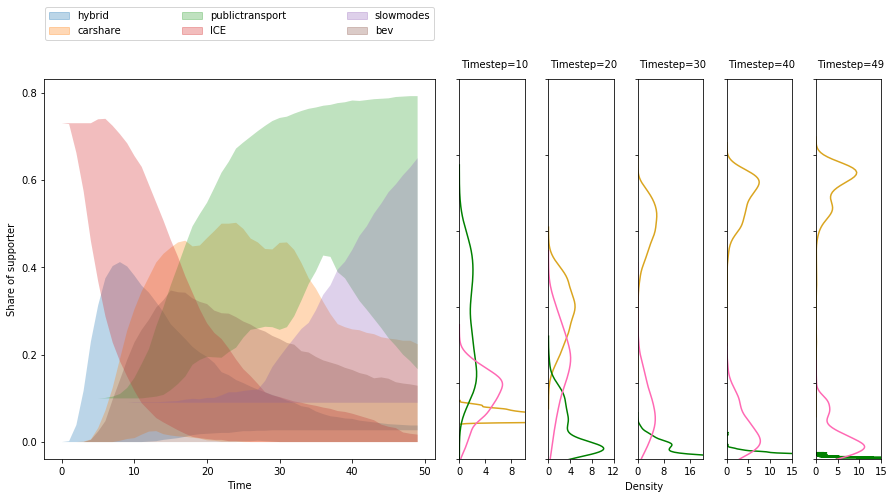

In [13]:
%matplotlib inline
from ema_workbench.analysis.plotting import envelopes
from ema_workbench.analysis.plotting_util import Density

experiments, outcomes = results

grid = plt.GridSpec(1, 6, wspace=0.2, hspace=0.3, width_ratios=[60,10,10,10,10,10])

#Create envelope plot
ooi = 'number supporter'

ax_env = envelopes(experiments, outcomes, outcomes_to_show=ooi, group_by='policy', density=Density.KDE, 
                   grouping_specifiers={'slowmodes', 'ICE', 'bev', 'publictransport', 'carshare', 'hybrid'},
                   titles={'share of supporter'},
          ylabels={'number supporter': 'Share of supporter'}, legend=True, fill=True)

#Assign created plot to the grid space        
ax_env[1]['number supporter'].set_position(grid[0].get_position(ax_env[0]))


data = outcomes[ooi] 

tech_list = ['hybrid', 'ICE', 'bev', 'publictransport', 'carshare', 'slowmodes'] 
time_list = [10, 20, 30, 40, 49]  

exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)

ooi_results=[]

for time in time_list:
    df_kde_list=[]
    for i, tech in enumerate(tech_list):        
        truncated_outcomes = out[exp['policy'] == tech].values        
        size = len(truncated_outcomes[:,time])
        df_kde_list.append(pd.DataFrame({'Share_of_supporter': truncated_outcomes[:, time].tolist(),
                                   'Technology':[tech]*size}, index=range(size)))
        
    df_kde=pd.concat(df_kde_list[i] for i in range(len(tech_list)))
    ooi_results.append(df_kde)


#create and assign KDEs with shared axis to grid cells
ax_kde = []
ax_kde.append(plt.subplot(grid[1]))
for i, val in enumerate([2,3,4,5]): 
    ax_kde.append(plt.subplot(grid[val], sharey=ax_kde[0]))
    ax_kde[i+1].set_yticklabels([])
    ax_kde[i+1].set_ylim([0, 1])
    
    
    
for j, val in enumerate(time_list):
    #sns.kdeplot(ooi_results[j].Share_of_supporter[ooi_results[j].Technology == 'bev'],label='bev', color='violet', legend=False, vertical=True, ax=ax_kde[j])
    sns.kdeplot(ooi_results[j].Share_of_supporter[ooi_results[j].Technology == 'publictransport'],label='publictransport', color='goldenrod', legend=False, vertical=True, ax=ax_kde[j])
    sns.kdeplot(ooi_results[j].Share_of_supporter[ooi_results[j].Technology == 'ICE'],label='ICE', color='green', legend=False, vertical=True, ax=ax_kde[j])
    #sns.kdeplot(ooi_results[j].Share_of_supporter[ooi_results[j].Technology == 'hybrid'],label='hybrid', color='mediumpurple', legend=False, vertical=True, ax=ax_kde[j])
    sns.kdeplot(ooi_results[j].Share_of_supporter[ooi_results[j].Technology == 'carshare'],label='carshare', color='hotpink', legend=False, vertical=True, ax=ax_kde[j])
    #sns.kdeplot(ooi_results[j].Share_of_supporter[ooi_results[j].Technology == 'slowmodes'],label='slowmodes', color='lightskyblue', legend=False, vertical=True, ax=ax_kde[j])
    ax_kde[j].annotate('Timestep=' + str(val) , xycoords='axes fraction' , textcoords='axes fraction', xy=(.02, 1.03), xytext=(.02, 1.03), size=10)


#Configure the figure size        
ax_env[0].set_size_inches(15, 7)

ax_env[1]['number supporter'].locator_params(nbins=6, axis='y')
    
for i in range(5):
    ax_kde[i].xaxis.set_major_locator(plt.MaxNLocator(3))

ax_kde[0].set_xlim(0, 10)
ax_kde[1].set_xlim(0, 12)
ax_kde[2].set_xlim(0, 20)
ax_kde[3].set_xlim(0, 15)
ax_kde[4].set_xlim(0, 15)


'''ax_kde[0].legend(bbox_to_anchor=(0., 1.02, 5.8, .102), loc=3,
           ncol=5, mode="expand", borderaxespad=0) '''

ax_kde[2].text( 2, -.08, 'Density', ha='center', fontsize=10)

# '''plt.savefig('{}/fig{}.png'.format(r'W:\emoallemi@student.unimelb.edu.au 2017-09-13 08_19\My Library\UNSW\Publications\ETM-MATISSE\figs', '_envelope_kdes_sup_dir_unc_1'), 
#             dpi=300, bbox_inches='tight')
# '''


In [14]:
ooi_results

[     Share_of_supporter Technology
 0                 0.021     hybrid
 1                 0.023     hybrid
 2                 0.002     hybrid
 3                 0.005     hybrid
 4                 0.058     hybrid
 5                 0.076     hybrid
 6                 0.006     hybrid
 7                 0.030     hybrid
 8                 0.000     hybrid
 9                 0.017     hybrid
 10                0.013     hybrid
 11                0.009     hybrid
 12                0.000     hybrid
 13                0.073     hybrid
 14                0.000     hybrid
 15                0.008     hybrid
 16                0.003     hybrid
 17                0.001     hybrid
 18                0.004     hybrid
 19                0.013     hybrid
 20                0.014     hybrid
 21                0.008     hybrid
 22                0.002     hybrid
 23                0.020     hybrid
 24                0.002     hybrid
 25                0.000     hybrid
 26                0.000    

In [16]:
df = pd.DataFrame(columns=['Position of supporter','statistics','time','practice dimension'])

mean_list = ['supporter_p0_mean', 'supporter_p1_mean', 
                       'supporter_p2_mean', 'supporter_p3_mean', 
                        'supporter_p4_mean', 'supporter_p5_mean',  
                       'supporter_p6_mean']
std_list = ['supporter_p0_StdDev', 'supporter_p1_StdDev', 
                       'supporter_p2_StdDev', 'supporter_p3_StdDev', 
                        'supporter_p4_StdDev', 'supporter_p5_StdDev',  
                       'supporter_p6_StdDev']

practice_dim = ['emissions', 'Cost', 'M private mobility', 
                'ICT',  'Build env', 'M public mobolity'
                ,'Conv.']

time_list = [10, 20, 30, 40, 49]

df_list = []

for i, mean in enumerate(mean_list):

    for time in time_list:
        
        size = outcomes[mean][:, time].shape[0]
        df_list.append(pd.DataFrame({'Position of supporter': outcomes[mean][:, time].tolist(),
                             'statistics':['Mean']*size, 
                             'time': [time]*size,
                             'practice dimension':[practice_dim[i]]*size}, index=range(size)))
        
for i, std in enumerate(std_list):

    for time in time_list:
        
        size = outcomes[std][:, time].shape[0]
        df_list.append(pd.DataFrame({'Position of supporter': outcomes[std][:, time].tolist(),
                             'statistics':['StdDev']*size, 
                             'time': [time]*size,
                             'practice dimension':[practice_dim[i]]*size}, index=range(size)))

df_results = pd.concat(df_list[i] for i in range(len(df_list)))

df0 = df_results[df_results['practice dimension'] == 'emissions']
df1 = df_results[df_results['practice dimension'] == 'Cost']
df2 = df_results[df_results['practice dimension'] == 'M private mobility']
df3 = df_results[df_results['practice dimension'] == 'ICT']
df4 = df_results[df_results['practice dimension'] == 'Build env']
df5 = df_results[df_results['practice dimension'] == 'M public mobolity']
df6 = df_results[df_results['practice dimension'] == 'Conv.']


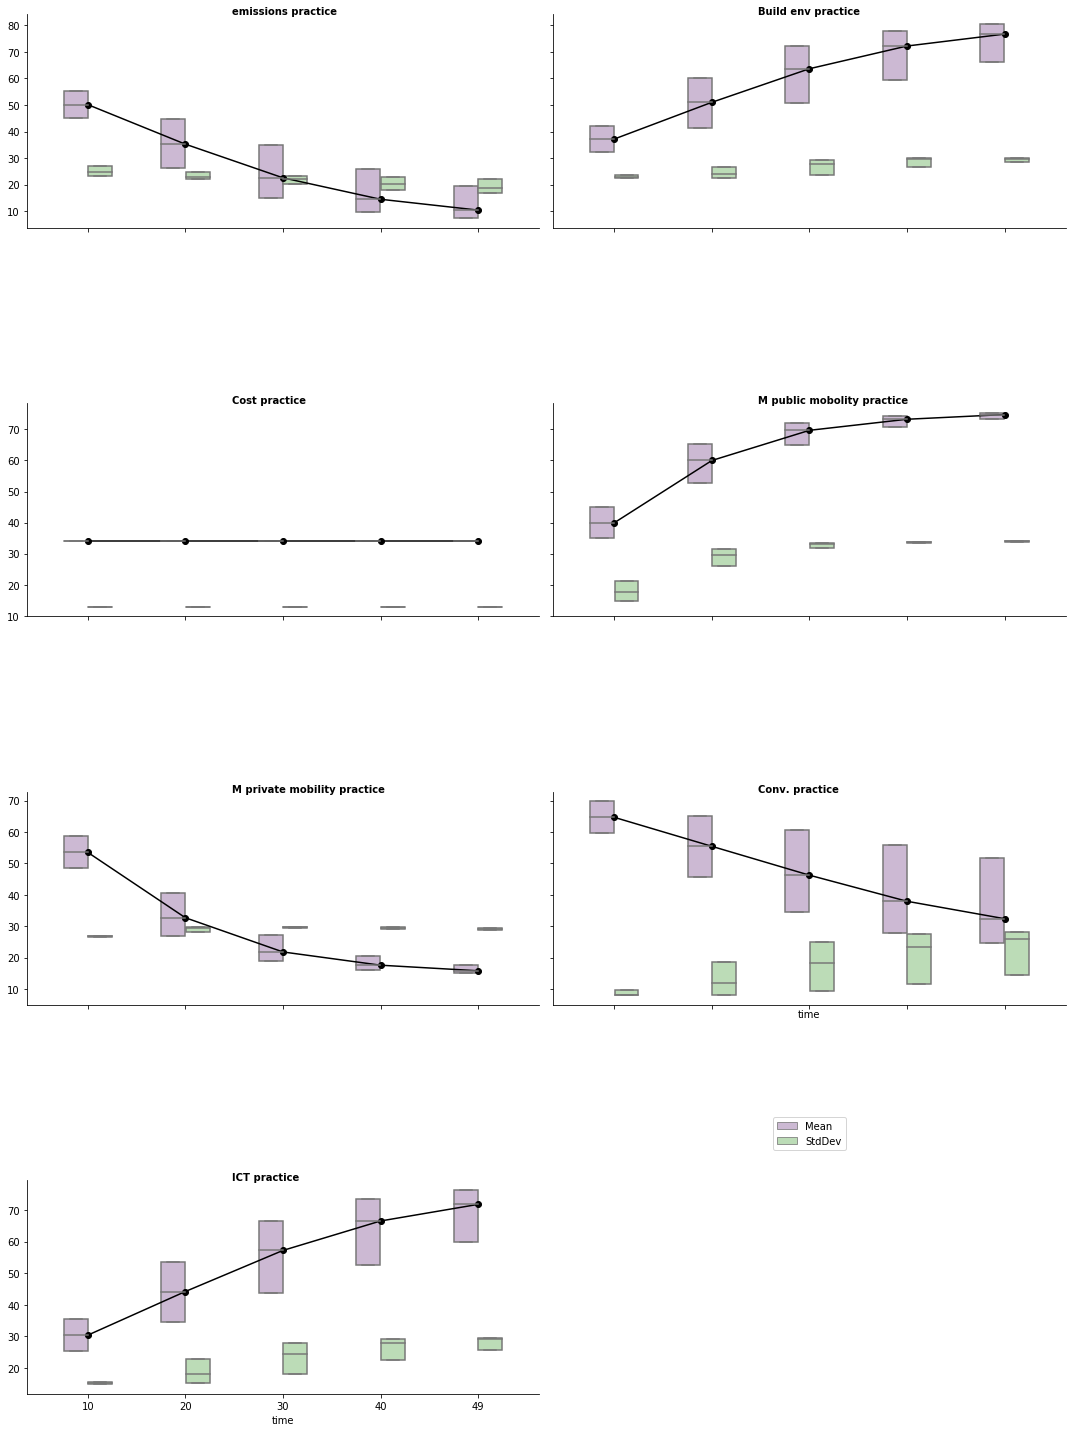

In [17]:
%matplotlib inline

import seaborn as sns

df_dict={'emissions':df0, 'Cost':df1, 'M private mobility': df2, 'ICT':df3, 'Build env':df4, 'M public mobolity':df5, 'Conv.':df6}



fig, ax = plt.subplots(4,2, figsize=(15,20), sharex='col', sharey='row')
fig.subplots_adjust(hspace=0.1, wspace=0.1)

i = 0
j = 0
for dim, df in df_dict.items():

    sns.boxplot(x="time", y="Position of supporter", hue="statistics", data=df, whis='range', palette="PRGn", width = .5, showfliers=False, ax=ax[i,j])
    sns.despine(offset=0, trim=False, bottom=False)




    median_list_mean = []
    #median_list_std = []
    time_list = [10, 20, 30, 40, 49]

    for time in time_list:
        median_list_mean.append(np.median(df.loc[(df['time']==time) & (df['statistics']=='Mean'), "Position of supporter"]))
        #median_list_std.append(np.median(df.loc[(df0['time']==time) & (df['statistics']=='StdDev'), "Position of supporter"]))

    ax[i,j].plot(median_list_mean,'ko-',label='line1')
    
    ax[i,j].xaxis.label.set_visible(False)
    ax[i,j].yaxis.label.set_visible(False)

    lgd = ax[i,j].get_legend()
    lgd.set_visible(False)

    
    ax[i, j].annotate(dim + ' practice ' , xycoords='axes fraction' , textcoords='axes fraction', xy=(.4, 1), xytext=(.4, 1), size=10, weight='bold')
    
    
    i += 1
    if i == 4:
        i = 0
        j = 1 


    
plt.setp(ax[0,0].get_xticklabels(), visible=False)
plt.setp(ax[0,1].get_xticklabels(), visible=False)
plt.setp(ax[1,0].get_xticklabels(), visible=False)
plt.setp(ax[1,1].get_xticklabels(), visible=False)
plt.setp(ax[1,0].get_xticklabels(), visible=False)

plt.setp(ax[0,1].get_yticklabels(), visible=False)
plt.setp(ax[1,1].get_yticklabels(), visible=False)
plt.setp(ax[2,1].get_yticklabels(), visible=False)


ax[3,0].xaxis.label.set_visible(True)
ax[2,1].xaxis.label.set_visible(True)

handles, labels = ax[2,1].get_legend_handles_labels()

ax[2,1].legend(handles[1:3], labels[1:3], bbox_to_anchor=(.5, -.5), loc='upper center')

fig.delaxes(ax[3,1])
fig.tight_layout()
        
# fig.savefig('{}/fig{}.png'.format(r'W:\emoallemi@student.unimelb.edu.au 2017-09-13 08_19\My Library\UNSW\Publications\ETM-MATISSE\figs', '_boxplots_supporter_unc'), dpi=300, bbox_inches='tight')

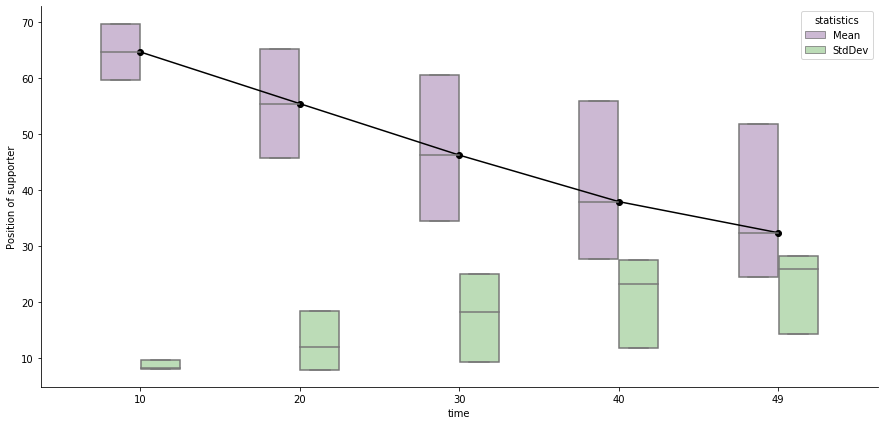

In [18]:
%matplotlib inline

import seaborn as sns

df=df6



fig, ax = plt.subplots(1,1, figsize=(15,7))

sns.boxplot(x="time", y="Position of supporter", hue="statistics", data=df, palette="PRGn", width = .5, showfliers=False)
sns.despine(offset=0, trim=False, bottom=False)
sns.set_style({'axes.axisbelow': True}, {'xtick.major.size': 4})



median_list_mean = []
#median_list_std = []
time_list = [10, 20, 30, 40, 49]

for time in time_list:
    median_list_mean.append(np.median(df.loc[(df['time']==time) & (df['statistics']=='Mean'), "Position of supporter"]))
    #median_list_std.append(np.median(df.loc[(df0['time']==time) & (df['statistics']=='StdDev'), "Position of supporter"]))

ax.plot(median_list_mean,'ko-',label='line1')
#ax.plot(median_list_std,'ko-',label='line2')
#plt.savefig('{}/fig{}.png'.format(r'W:\emoallemi@student.unimelb.edu.au 2017-09-13 08_19\My Library\UNSW\Publications\ETM-MATISSE\figs', '_boxplots_supporter'), dpi=300, bbox_inches='tight')

## to show the destabilisation of ICE as a regime

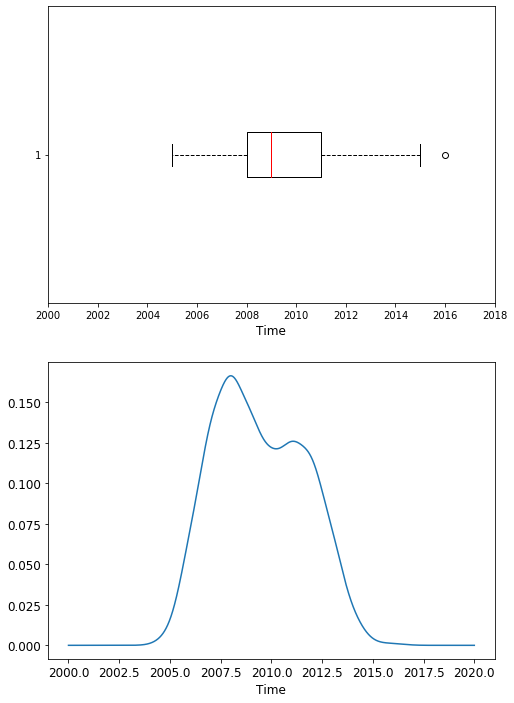

array([2008, 2009, 2009, 2010, 2007, 2007, 2011, 2007, 2012, 2012, 2009,
       2012, 2011, 2009, 2014, 2011, 2009, 2014, 2011, 2008, 2007, 2010,
       2008, 2007, 2013, 2011, 2013, 2014, 2009, 2009, 2007, 2013, 2007,
       2006, 2011, 2009, 2006, 2006, 2009, 2008, 2010, 2008, 2011, 2013,
       2008, 2009, 2012, 2013, 2008, 2008, 2007, 2009, 2011, 2008, 2011,
       2012, 2008, 2009, 2008, 2013, 2012, 2006, 2007, 2011, 2010, 2009,
       2013, 2009, 2008, 2007, 2008, 2009, 2010, 2006, 2014, 2006, 2012,
       2012, 2007, 2013, 2007, 2011, 2008, 2008, 2014, 2012, 2008, 2007,
       2007, 2013, 2007, 2007, 2012, 2010, 2010, 2010, 2010, 2009, 2009,
       2008, 2006, 2008, 2008, 2006, 2012, 2011, 2010, 2007, 2012, 2011,
       2012, 2008, 2012, 2008, 2008, 2010, 2010, 2008, 2013, 2009, 2011,
       2006, 2011, 2008, 2012, 2007, 2007, 2009, 2009, 2008, 2007, 2007,
       2008, 2010, 2008, 2008, 2013, 2012, 2009, 2011, 2009, 2012, 2006,
       2009, 2008, 2010, 2011, 2007, 2009, 2010, 20

In [20]:
from ema_workbench.analysis.plotting_util import determine_kde


experiments, outcomes = results

ooi = 'number supporter'
data = outcomes[ooi] 

exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)

truncated_outcomes = out[exp['policy'] == 'ICE'].values

threshold = .5
indices = np.argmax(truncated_outcomes < threshold, axis=1)

logical= np.min(truncated_outcomes, axis=1) < threshold
indices = indices[logical]

time = outcomes['time'][0,:]
time = time[indices]



fig, axes = plt.subplots(2, 1, figsize=(8, 12))


y, x = determine_kde(time, size_kde=10000,ymin=2000, ymax=2020)

bp = axes[0].boxplot(time, vert=False)
axes[0].set_xticks(np.arange(2000, 2020, 2))
axes[0].set_xlabel('Time', fontsize = 12)

for box in bp['boxes']:
    box.set(color='k', linewidth=1)
    
for whisker in bp['whiskers']:
    whisker.set(color='k', linewidth=1, linestyle='--')
    
for median in bp['medians']:
    median.set(color='red', linewidth=1)


axes[1].plot(x,y)
axes[1].set_xlabel('Time', fontsize = 12)

plt.xticks (fontsize = 12)
plt.yticks (fontsize = 12)



plt.show()

time

## to see the uptake of public transport takes place

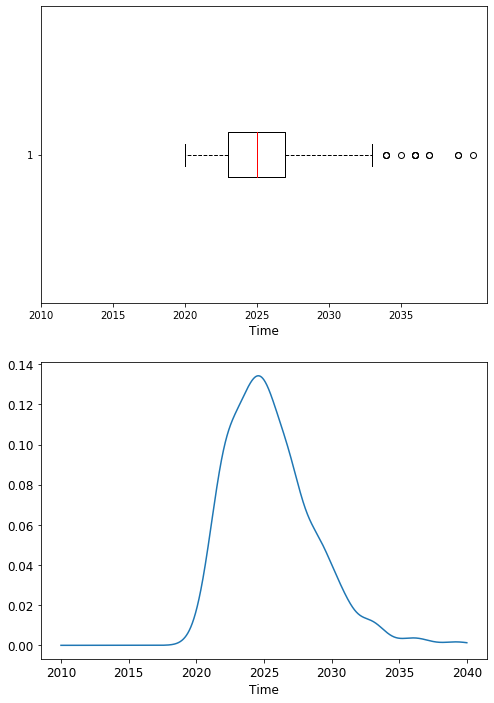

In [19]:
from ema_workbench.analysis.plotting_util import determine_kde

experiments, outcomes = results

ooi = 'number supporter'
data = outcomes[ooi] 

exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)

truncated_outcomes = out[exp['policy'] == 'publictransport'].values

threshold = .5
indices = np.argmax(truncated_outcomes > threshold, axis=1)

logical= np.max(truncated_outcomes, axis=1) > threshold
indices = indices[logical]

time = outcomes['time'][0,:]
time = time[indices]

fig, axes = plt.subplots(2, 1, figsize=(8, 12))


y, x = determine_kde(time, size_kde=10000,ymin=2010, ymax=2040)

bp = axes[0].boxplot(time, vert=False)
axes[0].set_xticks(np.arange(2010, 2040, 5))
axes[0].set_xlabel('Time', fontsize = 12)

for box in bp['boxes']:
    box.set(color='k', linewidth=1)
    
for whisker in bp['whiskers']:
    whisker.set(color='k', linewidth=1, linestyle='--')
    
for median in bp['medians']:
    median.set(color='red', linewidth=1)


axes[1].plot(x,y)
axes[1].set_xlabel('Time', fontsize = 12)

plt.xticks (fontsize = 12)
plt.yticks (fontsize = 12)



plt.show()

## to show the end state position of ICE vs. public transport in the practice space

C:\Users\angel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\angel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


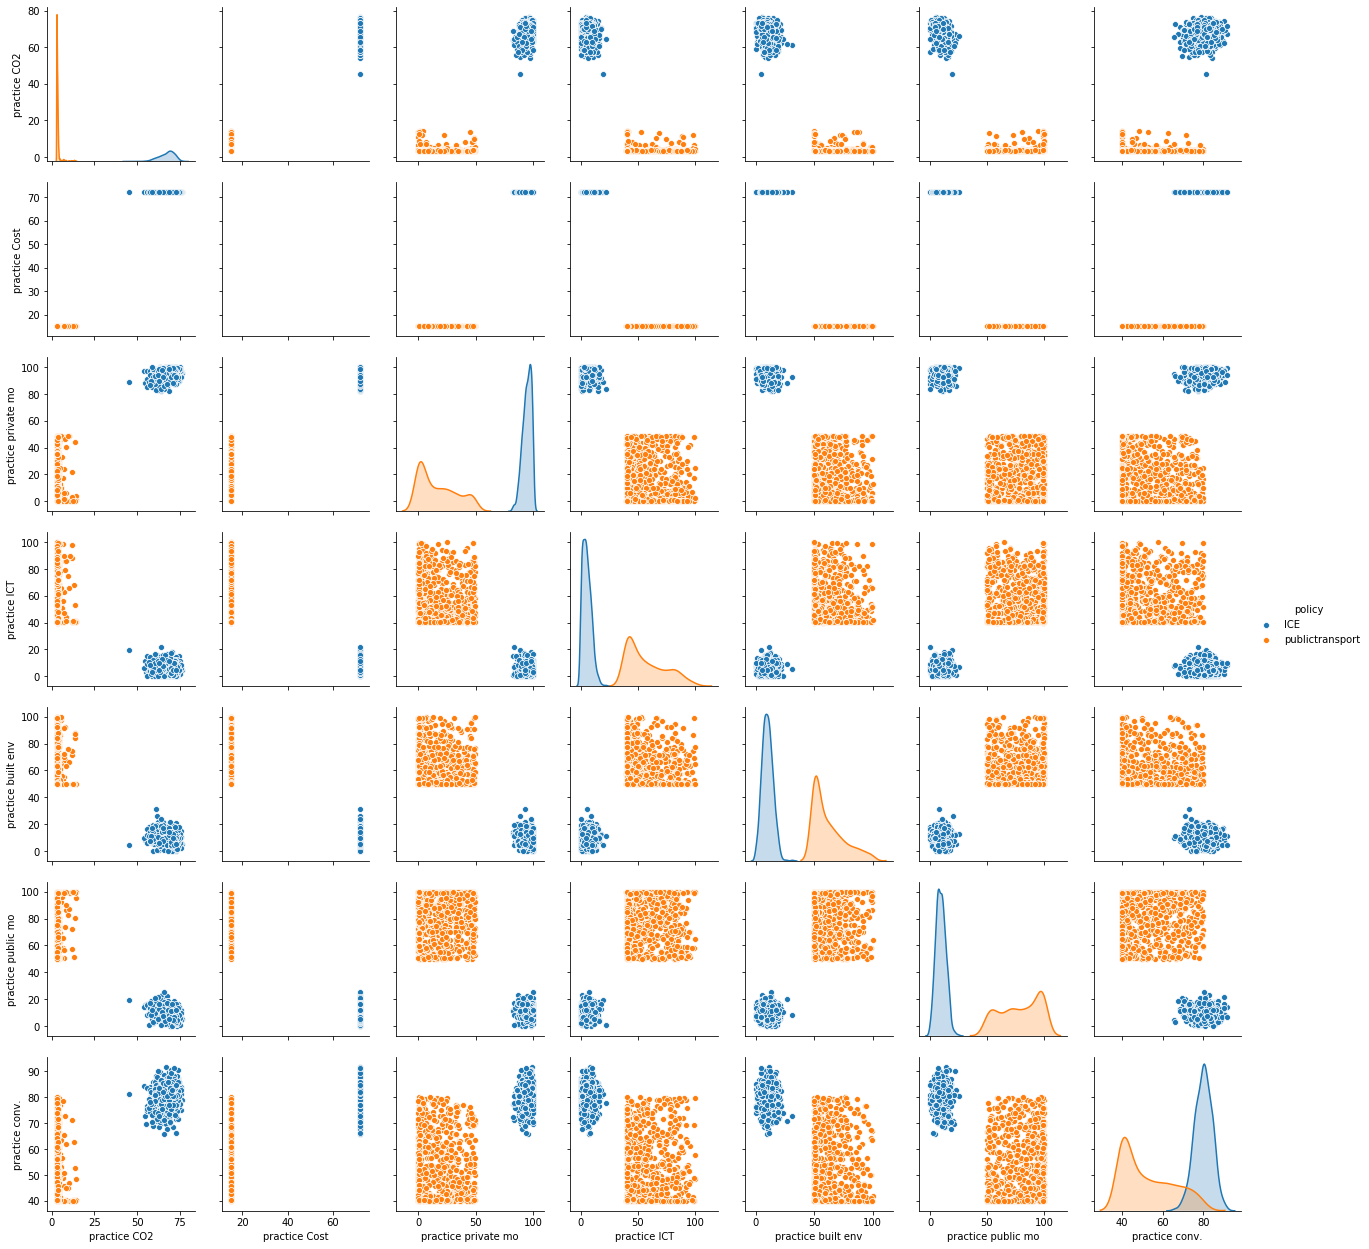

In [20]:
import seaborn as sns

experiments, outcomes = results

truncated_outcomes = { outcomes_key: outcomes[outcomes_key][:, -1] for outcomes_key in ['practice CO2', 'practice Cost', 'practice private mo', 'practice ICT', 
                        'practice built env', 'practice public mo', 'practice conv.'] }

df = pd.DataFrame.from_dict(truncated_outcomes)
df = df.assign(policy=experiments['policy'])


# rename the policies using numbers
#df['policy'] = df['policy'].map({p:i for i, p in
                                #enumerate(set(experiments['policy']))})
 
#use seaborn to plot the dataframe
grid = sns.pairplot(df, hue='policy',hue_order=['ICE', 'publictransport'],  vars=truncated_outcomes.keys())
ax = plt.gca()
plt.show()


In [8]:
experiments, outcomes = results

ooi = 'number supporter'
data = outcomes[ooi] 

exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)

truncated_outcomes = out[exp['policy'] == 'publictransport'].values

threshold = .5
indices = np.argmax(truncated_outcomes > threshold, axis=1)

logical= np.max(truncated_outcomes, axis=1) > threshold
indices = indices[logical]

time = outcomes['time'][0,:]
time = time[indices]

## Scenario discovery

In [19]:
#truncate experiments and outcomes for a selected policy and a selected outcome in a timestep


experiments, outcomes = results

policies_list = np.unique(experiments['policy'])

uncertainties = ['directioncarMIV', 'directioncarOEV', 'directioncarICT', 'directioncarBuildenv', 
                 'directioncarCO2', 'directioncarCost', 'directioncarConv']
                     
nexp_policy = len(experiments)/len(policies_list)

truncated_exp = np.zeros(int(nexp_policy), dtype={'names':uncertainties, 'formats':['float64']*len(uncertainties)})
    
        
for i in range(int(nexp_policy)):
    l = []
    for j, uncertainty in enumerate(uncertainties):
        cell = experiments.iloc[i][j]
        l.append(cell)
    unc_set = tuple(l)
    truncated_exp[i] = unc_set

    
ooi = 'number supporter'
data = outcomes[ooi] 

exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)

truncated_outcomes = out[exp['policy'] == 'publictransport'].values
truncated_outcomes_timeslice = truncated_outcomes [:, 20]

In [23]:
from EMAworkbench.ema_workbench.analysis import prim
 
 
x = pd.DataFrame(truncated_exp)
y = truncated_outcomes_timeslice > .5

prim_alg = prim.Prim(x, y, threshold=.5, threshold_type=1)
box1 = prim_alg.find_box()



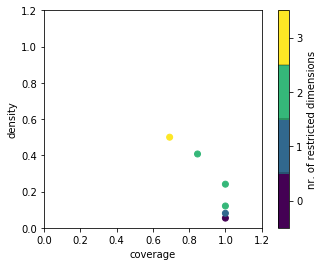

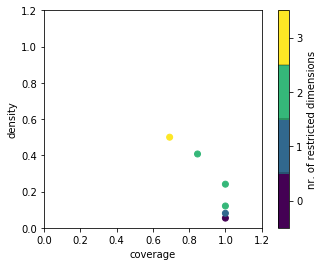

In [24]:
%matplotlib inline

box1.show_tradeoff()



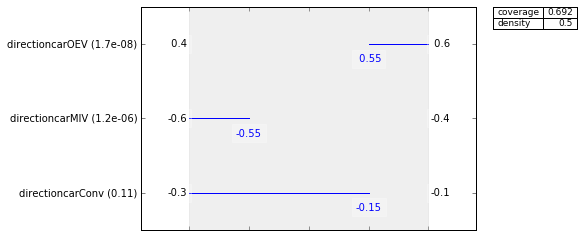

In [102]:
%matplotlib inline

box_1 = box1.inspect(5, style='graph')



## Dimensional stacking

In [25]:
#truncate experiments and outcomes for a selected policy and a selected outcome in a timestep


experiments, outcomes = results

policies_list = np.unique(experiments['policy'])

uncertainties = ['directioncarMIV', 'directioncarOEV', 'directioncarICT', 'directioncarBuildenv', 
                 'directioncarCO2', 'directioncarCost', 'directioncarConv']
                     
nexp_policy = len(experiments)/len(policies_list)

truncated_exp = np.zeros(int(nexp_policy), dtype={'names':uncertainties, 'formats':['float64']*len(uncertainties)})
    
        
for i in range(int(nexp_policy)):
    l = []
    for j, uncertainty in enumerate(uncertainties):
        cell = experiments[i][j]
        l.append(cell)
    unc_set = tuple(l)
    truncated_exp[i] = unc_set

    
ooi = 'number supporter'
data = outcomes[ooi] 

exp = pd.DataFrame(experiments)
out = pd.DataFrame(data)

truncated_outcomes = out[exp['policy'] == 'publictransport'].values
truncated_outcomes_timeslice = truncated_outcomes [:, 20]

KeyError: 0

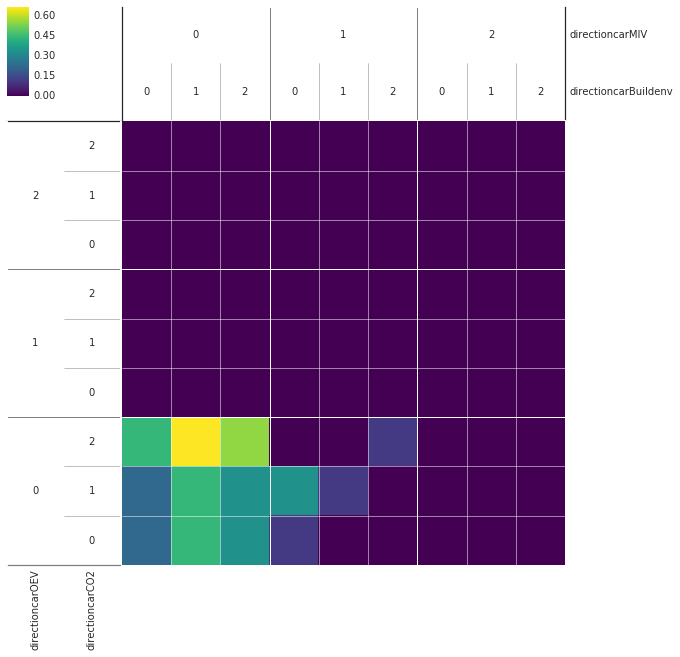

In [87]:
from ema_workbench.analysis import dimensional_stacking_2


x = truncated_exp
y = truncated_outcomes_timeslice > .5

dimensional_stacking_2.create_pivot_plot(x,y, nr_levels=2 ,nbins=3)
plt.show()

## Feature scoring

In [20]:
results = experiments, outcomes
ooilist = ['number supporter']

outcomes_scalar = {}

for ooi in ooilist:
    outcomes_scalar[ooi] = outcomes[ooi][:, -1]
    


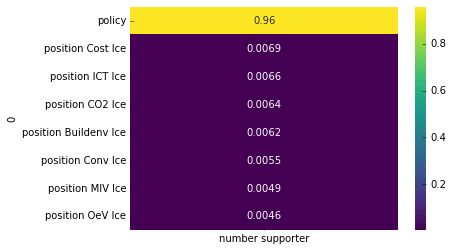

In [21]:
import seaborn as sns

from ema_workbench.analysis import feature_scoring

x = experiments
y = outcomes_scalar

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)

plt.show()

In [ ]:
%matplotlib inline

from __future__ import division
import csv

import scipy.stats as stats
import matplotlib.ticker as ticker
from matplotlib import cm
import seaborn as sns

sns.set_style('white')

def normalize(data):
    minima = np.min(data, axis=0)
    maxima = np.max(data, axis=0)
    a = 1/(maxima-minima)
    b = minima/(minima-maxima)
    data = a * data + b                    
    return data


def make_kde(data):
    nr_points = 250
    grid = np.linspace(0, 1, nr_points)
    
    kde = stats.kde.gaussian_kde(data.T)
    x, y = np.meshgrid(grid, grid)
    grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
    z = kde(grid_coords.T)
    z = z.reshape(nr_points,nr_points)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(np.flipud(z), cmap=cm.coolwarm)
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig


def make_kde_scaled(class_data, full_data):
    nr_points = 250
    grid = np.linspace(0, 1, nr_points)
    
    x, y = np.meshgrid(grid, grid)
    grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
    
    kde_class = stats.kde.gaussian_kde(class_data.T)
    z_class = kde_class(grid_coords.T)
    z_class = z_class.reshape(nr_points,nr_points)
    
    kde_full = stats.kde.gaussian_kde(full_data.T)
    z_full = kde_full(grid_coords.T)
    z_full = z_full.reshape(nr_points,nr_points)

    # rescale
    class_max = np.max(z_class)
    loc = np.where(z_class==class_max)
    full_at_loc = z_full[loc]
    
    z_class = (full_at_loc/class_max ) * z_class
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(np.flipud(z_class), vmax=np.max(z_full), cmap=cm.coolwarm)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig


def make_parallel_plot(data, labels):

    fig = plt.figure()
    axes = []
    
    for i in range(1, data.shape[1]):
        ax = fig.add_subplot(1,data.shape[1]-1,i,  ylim=(-0.1,1.1))
        axes.append(ax)
        ax.set_xlim([i,i+1])
        ax.xaxis.set_major_locator(ticker.FixedLocator([i]))
        ax.xaxis.set_ticklabels([labels[i-1]])
        ax.xaxis.set_tick_params(bottom=False, top=False)
        
        ax.yaxis.set_ticks([])
        ax.text(i, 1.01, "1", va="bottom", ha="center")
        ax.text(i, -0.01, "0", va="top", ha="center")
        
        ax.spines['left'].set_bounds(0, 1)
        ax.spines['right'].set_bounds(0, 1)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)

    ax.spines['right'].set_bounds(0, 1)
    ax.xaxis.set_major_locator(ticker.FixedLocator([i, i+1]))
    ax.xaxis.set_ticklabels(labels[i-1:i+1])
    ax.text(i+1, 1.01, "1", va="bottom", ha="center")
    ax.text(i+1, -0.01, "0", va="top", ha="center")
    
    for tick in ax.yaxis.get_major_ticks():
        tick.label2On=True
    
    plt.subplots_adjust(wspace=0)
    
    return fig, axes


def plot_data_parallel(data, labels, classes):
    C = set(classes)
    C = list(C)
    C.sort()
    
    norm_data = normalize(data)
    figures = []
    for index, Ci in enumerate(C):
        fig, axes = make_parallel_plot(data, labels)
        fig.suptitle('class {}'.format(Ci), fontsize=20)
        figures.append(fig)
        logical = classes==Ci
        
        for i,j in zip(range(data.shape[1]-1),range(1,data.shape[1])):
            ax = axes[i]
            y = norm_data[logical==False, i:j+1]
            x = np.tile([i+1,j+1], (data.shape[0], 1))
            ax.plot(x.T, y.T, c='#C0C0C0')
            
            y = norm_data[logical, i:j+1]
            x = np.tile([i+1,j+1], (data.shape[0], 1))
            ax.plot(x.T, y.T, c='b')
            
    return figures

In [ ]:
# three outputs of interest are selected here
import numpy as np


oois = ['number supporter', 'practice CO2', 'practice Cost']



data = np.array([[outcomes[oois[0]].mean(axis=1)[i], outcomes[oois[1]][:,-1][i], outcomes[oois[2]][:,-1][i]] 
                 for i in range(len(experiments))])
data = normalize(data)

In [ ]:
#Optimum number of clusters is chosen here based on two criteria. 
#The graph shows two criteria for the Bayesian Information Criterion (BIC) and Aikake's Information Criterion (AIC), 
#fitting a GMM over a range of 1 to 10 possible clusters.

from sklearn import mixture

aic = []
bic = []
max_components = 15
x = [x for x in range(1,max_components)]

for nc in x:
    g = mixture.GMM(n_components=int(nc), n_iter=500)
    g.fit(data)
    if g.converged_:
        aic.append(g.aic(data))
        bic.append(g.bic(data))
    else:
        aic.append(None)
        bic.append(None)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(data)
pca_data = pca.transform(data)
pca_data = normalize(pca_data)

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x, aic, label='AIC')
ax.plot(x, bic, label='BIC')
ax.legend(loc='best')
ax.set_xlabel('Components')

plt.show()

In [ ]:
n_clusters = 5

g = mixture.GMM(n_components=n_clusters, n_iter=500)
g.fit(data)
pred = g.predict(data)

In [ ]:
from ema_workbench.analysis.pairs_plotting import pairs_scatter


header = ['number supporter', 'practice CO2', 'practice Cost']

labels = {'SubsurfaceUse':'Fraction of subsurface used','number supporter':'number supporter', 
          'practice CO2':'practice CO2', 'practice Cost':'practice Cost' }
            
temp_outcomes = {header[i]:data[:, i] for i in range(len(header))}
temp_experiments = pred.astype(np.str).view([('classes', np.str)])

temp_results = temp_experiments, temp_outcomes

fig, axes = pairs_scatter(temp_results, group_by='classes',
                          grouping_specifiers=set(temp_experiments['classes']),
                          ylabels=labels,
                          filter_scalar=False)

fig.set_size_inches(15,15,forward=True)


#plt.savefig('{}/fig{}_highres.png'.format(r'W:\emoallemi@student.unimelb.edu.au 2017-09-13 08_19\My Library\UNSW\Publications\EM Experiment Design\Implementation\figs', 'scatter_full_quartile_041017'), 
            #dpi=300, bbox_inches='tight') 

plt.show()

## Connector file

In [ ]:
import sys
sys.path.append(r'W:\emoallemi@student.unimelb.edu.au 2017-09-13 08_19\My Library\UNSW\EMA\EMAworkbench-master_130118')

from ema_workbench.connectors import import_MATISSE_nopolicy


uncertainties = ['directioncarMIV', 'directioncarOEV', 'directioncarICT', 'directioncarBuildenv', 
                 'directiongreencarMIV', 'directiongreencarOEV', 'directiongreencarICT', 'directiongreencarBuildenv', 
                 'directionslowMIV', 'directionslowOEV', 'directionslowICT', 'directionslowBuildenv', 
                 'directionpublicMIV', 'directionpublicOEV', 'directionpublicICT', 'directionpublicBuildenv']


outcomes_of_interest = ['state', 'number supporter', 'strength', 
                        'practice CO2', 'practice Cost', 'practice private mo', 'practice ICT', 
                        'practice built env', 'practice public mo', 'practice conv.', 
                        'direction CO2', 'direction Cost', 'direction private mo', 'direction ICT', 
                        'direction built env', 'direction public mo', 'direction conv.']

policies = [{'name':'bev', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\bev'}, 
            {'name':'biofuel', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\biofuel'}, 
            {'name':'carshare', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\carshare'}, 
            {'name':'hybrid', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\hybrid'}, 
            {'name':'hydrogen', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\hydrogen'}, 
            {'name':'ICE', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\ICE'}, 
            {'name':'publictransport', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\publictransport'}, 
            {'name':'slowmodes', 
             'file':r'\\Mac\Home\Desktop\MATISSEDatabase\slowmodes'}]

number_of_experiments = 147

x = import_MATISSE_nopolicy.ImportfromMATISSE(uncertainties, outcomes_of_interest, policies, number_of_experiments)

results = x.extract_results()
